## LIBRERIAS

In [2]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EXTRACCIÓN DATOS PDF - CSV

In [20]:
# Información cruda
name = "B-1;P-1.csv"
raw_data = """
1 -8,54 MLWS 11,25 51 -21,04 MLWS 23,75 8 72 492 31,3
2 -8,79 MLWS 11,50 19 36 19 13 52 -21,29 MLWS 24,00 9 72 501 27,8
3 -9,04 MLWS 11,75 12 36 31 21 53 -21,54 MLWS 24,25 9 72 510 27,8
4 -9,29 MLWS 12,00 15 72 46 17 54 -21,79 MLWS 24,50 9 72 519 27,8
5 -9,54 MLWS 12,25 15 72 61 17 55 -22,04 MLWS 24,75 9 72 528 27,8
6 -9,79 MLWS 12,50 15 72 76 17 56 -22,29 MLWS 25,00 9 72 537 27,8
7 -10,04 MLWS 12,75 14 72 90 18 57 -22,54 MLWS 25,25 7 72 544 35,7
8 -10,29 MLWS 13,00 14 72 104 18 58 -22,79 MLWS 25,50 8 72 552 31,3
9 -10,54 MLWS 13,25 14 72 118 18 59 -23,04 MLWS 25,75 8 72 560 31,3
10 -10,79 MLWS 13,50 13 72 131 19 60 -23,29 MLWS 26,00 8 72 568 31,3
11 -11,04 MLWS 13,75 14 72 145 18 61 -23,54 MLWS 26,25 8 72 576 31,3
12 -11,29 MLWS 14,00 14 72 159 18 62 -23,79 MLWS 26,50 8 72 584 31,3
13 -11,54 MLWS 14,25 14 72 173 18 63 -24,04 MLWS 26,75 8 72 592 31,3
14 -11,79 MLWS 14,50 14 72 187 18 64 -24,29 MLWS 27,00 8 72 600 31,3
15 -12,04 MLWS 14,75 14 72 201 18 65 -24,54 MLWS 27,25 8 72 608 31,3
16 -12,29 MLWS 15,00 13 72 214 19 66 -24,79 MLWS 27,50 10 72 618 25,0
17 -12,54 MLWS 15,25 11 72 225 23 67 -25,04 MLWS 27,75 9 72 627 27,8
18 -12,79 MLWS 15,50 11 72 236 23 68 -25,29 MLWS 28,00 9 72 636 27,8
19 -13,04 MLWS 15,75 9 72 245 28 69 -25,54 MLWS 28,25 9 72 645 27,8
20 -13,29 MLWS 16,00 9 72 254 28 70 -25,79 MLWS 28,50 9 72 654 27,8
21 -13,54 MLWS 16,25 9 72 263 28 71 -26,04 MLWS 28,75 10 72 664 25,0
22 -13,79 MLWS 16,50 9 72 272 28 72 -26,29 MLWS 29,00 9 72 673 27,8
23 -14,04 MLWS 16,75 8 72 280 31 73 -26,54 MLWS 29,25 10 72 683 25,0
24 -14,29 MLWS 17,00 6 72 286 42 74 -26,79 MLWS 29,50 9 72 692 27,8
25 -14,54 MLWS 17,25 15 72 301 17 75 -27,04 MLWS 29,75 10 72 702 25,0
26 -14,79 MLWS 17,50 12 72 313 21 76 -27,29 MLWS 30,00 10 72 712 25,0
27 -15,04 MLWS 17,75 12 72 325 21 77 -27,54 MLWS 30,25 10 72 722 25,0
28 -15,29 MLWS 18,00 10 72 335 25 78 -27,79 MLWS 30,50 10 72 732 25,0
29 -15,54 MLWS 18,25 9 72 344 28 79 -28,04 MLWS 30,75 12 72 744 20,8
30 -15,79 MLWS 18,50 8 72 352 31 80 -28,29 MLWS 31,00 11 72 755 22,7
31 -16,04 MLWS 18,75 8 72 360 31 81 -28,54 MLWS 31,25 11 72 766 22,7
32 -16,29 MLWS 19,00 6 72 366 42 82 -28,79 MLWS 31,50 12 72 778 20,8
33 -16,54 MLWS 19,25 7 72 373 36 83 -29,04 MLWS 31,75 12 72 790 20,8
34 -16,79 MLWS 19,50 7 72 380 36 84 -29,29 MLWS 32,00 12 72 802 20,8
35 -17,04 MLWS 19,75 6 72 386 42 85 -29,54 MLWS 32,25 12 72 814 20,8
36 -17,29 MLWS 20,00 6 72 392 42 86 -29,79 MLWS 32,50 13 72 827 19,2
37 -17,54 MLWS 20,25 6 72 398 42 87 -30,04 MLWS 32,75 13 72 840 19,2
38 -17,79 MLWS 20,50 7 72 405 36 88 -30,29 MLWS 33,00 13 72 853 19,2
39 -18,04 MLWS 20,75 6 72 411 42 89 -30,54 MLWS 33,25 13 72 866 19,2
40 -18,29 MLWS 21,00 6 72 417 42 90 -30,79 MLWS 33,50 13 72 879 19,2
41 -18,54 MLWS 21,25 6 72 423 42 91 -31,04 MLWS 33,75 13 72 892 19,2
42 -18,79 MLWS 21,50 6 72 429 42 92 -31,29 MLWS 34,00 13 72 905 19,2
43 -19,04 MLWS 21,75 6 72 435 42 93 -31,54 MLWS 34,25 15 72 920 16,7
44 -19,29 MLWS 22,00 6 72 441 42 94 -31,79 MLWS 34,50 15 72 935 16,7
45 -19,54 MLWS 22,25 7 72 448 36 95 -32,04 MLWS 34,75 15 72 950 16,7
46 -19,79 MLWS 22,50 7 72 455 36 96 -32,29 MLWS 35,00 14 72 964 17,9
47 -20,04 MLWS 22,75 7 72 462 36 97 -32,54 MLWS 35,25 15 72 979 16,7
48 -20,29 MLWS 23,00 8 72 470 31 98 -32,79 MLWS 35,50 15 72 994 16,7
49 -20,54 MLWS 23,25 7 72 477 36 99 -33,04 MLWS 35,75 15 72 1.009 16,7
50 -20,79 MLWS 23,50 7 72 484 36 100 -33,29 MLWS 36,00 15 72 1.024 16,7
101 -33,54 MLWS 36,25 15 72 1.039 16,7 151 -46,04 MLWS 48,75 29 120 2.338 8,6
102 -33,79 MLWS 36,50 15 72 1.054 16,7 152 -46,29 MLWS 49,00 29 120 2.367 8,6
103 -34,04 MLWS 36,75 15 72 1.069 16,7 153 -46,54 MLWS 49,25 28 120 2.395 8,9
104 -34,29 MLWS 37,00 15 72 1.084 16,7 154 -46,79 MLWS 49,50 27 120 2.422 9,3
105 -34,54 MLWS 37,25 15 72 1.099 16,7 155 -47,04 MLWS 49,75 28 120 2.450 8,9
106 -34,79 MLWS 37,50 15 72 1.114 16,7 156 -47,29 MLWS 50,00 28 120 2.478 8,9
107 -35,04 MLWS 37,75 15 72 1.129 16,7 157 -47,54 MLWS 50,25 27 120 2.505 9,3
108 -35,29 MLWS 38,00 17 72 1.146 14,7 158 -47,79 MLWS 50,50 29 120 2.534 8,6
109 -35,54 MLWS 38,25 21 72 1.167 11,9 159 -48,04 MLWS 50,75 30 120 2.564 8,3
110 -35,79 MLWS 38,50 17 72 1.184 14,7 160 -48,29 MLWS 51,00 30 120 2.594 8,3
111 -36,04 MLWS 38,75 19 72 1.203 13,2 161 -48,54 MLWS 51,25 29 120 2.623 8,6
112 -36,29 MLWS 39,00 20 72 1.223 12,5 162 -48,79 MLWS 51,50 30 120 2.653 8,3
113 -36,54 MLWS 39,25 21 72 1.244 11,9 163 -49,04 MLWS 51,75 30 120 2.683 8,3
114 -36,79 MLWS 39,50 21 72 1.265 11,9 164 -49,29 MLWS 52,00 31 120 2.714 8,1
115 -37,04 MLWS 39,75 22 72 1.287 11,4 165 -49,54 MLWS 52,25 28 120 2.742 8,9
116 -37,29 MLWS 40,00 21 72 1.308 11,9 166 -49,79 MLWS 52,50 29 120 2.771 8,6
117 -37,54 MLWS 40,25 21 72 1.329 11,9 167 -50,04 MLWS 52,75 33 120 2.804 7,6
118 -37,79 MLWS 40,50 23 72 1.352 10,9 168 -50,29 MLWS 53,00 32 150 2.836 7,8
119 -38,04 MLWS 40,75 21 72 1.373 11,9 169 -50,54 MLWS 53,25 32 150 2.868 7,8
120 -38,29 MLWS 41,00 21 72 1.394 11,9 170 -50,79 MLWS 53,50 31 150 2.899 8,1
121 -38,54 MLWS 41,25 21 72 1.415 11,9 171 -51,04 MLWS 53,75 32 150 2.931 7,8
122 -38,79 MLWS 41,50 21 72 1.436 11,9 172 -51,29 MLWS 54,00 35 150 2.966 7,1
123 -39,04 MLWS 41,75 21 72 1.457 11,9 173 -51,54 MLWS 54,25 34 150 3.000 7,4
124 -39,29 MLWS 42,00 21 72 1.478 11,9 174 -51,79 MLWS 54,50 33 150 3.033 7,6
125 -39,54 MLWS 42,25 21 72 1.499 11,9 175 -52,04 MLWS 54,75 34 150 3.067 7,4
126 -39,79 MLWS 42,50 21 72 1.520 11,9 176 -52,29 MLWS 55,00 34 150 3.101 7,4
127 -40,04 MLWS 42,75 21 72 1.541 11,9 177 -52,54 MLWS 55,25 34 150 3.135 7,4
128 -40,29 MLWS 43,00 21 72 1.562 11,9 178 -52,79 MLWS 55,50 35 150 3.170 7,1
129 -40,54 MLWS 43,25 21 72 1.583 11,9 179 -53,04 MLWS 55,75 37 150 3.207 6,8
130 -40,79 MLWS 43,50 23 72 1.606 10,9 180 -53,29 MLWS 56,00 36 150 3.243 6,9
131 -41,04 MLWS 43,75 23 72 1.629 10,9 181 -53,54 MLWS 56,25 35 150 3.278 7,1
132 -41,29 MLWS 44,00 23 72 1.652 10,9 182 -53,79 MLWS 56,50 35 150 3.313 7,1
133 -41,54 MLWS 44,25 24 72 1.676 10,4 183 -54,04 MLWS 56,75 35 150 3.348 7,1
134 -41,79 MLWS 44,50 24 72 1.700 10,4 184 -54,29 MLWS 57,00 36 150 3.384 6,9
135 -42,04 MLWS 44,75 25 72 1.725 10,0 185 -54,54 MLWS 57,25 38 150 3.422 6,6
136 -42,29 MLWS 45,00 25 72 1.750 10,0 186 -54,79 MLWS 57,50 37 150 3.459 6,8
137 -42,54 MLWS 45,25 67 72 1.817 3,7 187 -55,04 MLWS 57,75 37 150 3.496 6,8
138 -42,79 MLWS 45,50 65 72 1.882 3,8 188 -55,29 MLWS 58,00 38 150 3.534 6,6
139 -43,04 MLWS 45,75 67 72 1.949 3,7 189 -55,54 MLWS 58,25 38 150 3.572 6,6
140 -43,29 MLWS 46,00 60 120 2.009 4,2 190 -55,79 MLWS 58,50 39 150 3.611 6,4
141 -43,54 MLWS 46,25 42 120 2.051 6,0 191 -56,04 MLWS 58,75 39 150 3.650 6,4
142 -43,79 MLWS 46,50 30 120 2.081 8,3 192 -56,29 MLWS 59,00 40 150 3.690 6,3
143 -44,04 MLWS 46,75 30 120 2.111 8,3 193 -56,54 MLWS 59,25 44 150 3.734 5,7
144 -44,29 MLWS 47,00 30 120 2.141 8,3 194 -56,79 MLWS 59,50 43 150 3.777 5,8
145 -44,54 MLWS 47,25 30 120 2.171 8,3 195 -57,04 MLWS 59,75 42 150 3.819 6,0
146 -44,79 MLWS 47,50 28 120 2.199 8,9 196 -57,29 MLWS 60,00 43 150 3.862 5,8
147 -45,04 MLWS 47,75 27 120 2.226 9,3 197 -57,54 MLWS 60,25 42 190 3.904 6,0
148 -45,29 MLWS 48,00 28 120 2.254 8,9 198 -57,79 MLWS 60,50 42 190 3.946 6,0
149 -45,54 MLWS 48,25 27 120 2.281 9,3 199 -58,04 MLWS 60,75 42 190 3.988 6,0
150 -45,79 MLWS 48,50 28 120 2.309 8,9 200 -58,29 MLWS 61,00 44 190 4.032 5,7
201 -58,54 MLWS 61,25 43 190 4.075 5,8 251 - 7.523 -
202 -58,79 MLWS 61,50 45 190 4.120 5,6 252 - 7.523 -
203 -59,04 MLWS 61,75 45 190 4.165 5,6 253 - 7.523 -
204 -59,29 MLWS 62,00 45 190 4.210 5,6 254 - 7.523 -
205 -59,54 MLWS 62,25 48 190 4.258 5,2 255 - 7.523 -
206 -59,79 MLWS 62,50 48 190 4.306 5,2 256 - 7.523 -
207 -60,04 MLWS 62,75 46 190 4.352 5,4 257 - 7.523 -
208 -60,29 MLWS 63,00 47 190 4.399 5,3 258 - 7.523 -
209 -60,54 MLWS 63,25 47 190 4.446 5,3 259 - 7.523 -
210 -60,79 MLWS 63,50 46 190 4.492 5,4 260 - 7.523 -
211 -61,04 MLWS 63,75 47 190 4.539 5,3 261 - 7.523 -
212 -61,29 MLWS 64,00 49 190 4.588 5,1 262 - 7.523 -
213 -61,54 MLWS 64,25 50 190 4.638 5,0 263 - 7.523 -
214 -61,79 MLWS 64,50 49 190 4.687 5,1 264 - 7.523 -
215 -62,04 MLWS 64,75 54 190 4.741 4,6 265 - 7.523 -
216 -62,29 MLWS 65,00 54 190 4.795 4,6 266 - 7.523 -
217 -62,54 MLWS 65,25 92 190 4.887 2,7 267 - 7.523 -
218 -62,79 MLWS 65,50 92 190 4.979 2,7 268 - 7.523 -
219 -63,04 MLWS 65,75 92 190 5.071 2,7 269 - 7.523 -
220 -63,29 MLWS 66,00 72 190 5.143 3,5 270 - 7.523 -
221 -63,54 MLWS 66,25 63 190 5.206 4,0 271 - 7.523 -
222 -63,79 MLWS 66,50 73 190 5.279 3,4 272 - 7.523 -
223 -64,04 MLWS 66,75 68 190 5.347 3,7 273 - 7.523 -
224 -64,29 MLWS 67,00 68 190 5.415 3,7 274 - 7.523 -
225 -64,54 MLWS 67,25 69 190 5.484 3,6 275 - 7.523 -
226 -64,79 MLWS 67,50 66 190 5.550 3,8 276 - 7.523 -
227 -65,04 MLWS 67,75 73 190 5.623 3,4 277 - 7.523 -
228 -65,29 MLWS 68,00 70 190 5.693 3,6 278 - 7.523 -
229 -65,54 MLWS 68,25 71 190 5.764 3,5 279 - 7.523 -
230 -65,79 MLWS 68,50 70 190 5.834 3,6 280 - 7.523 -
231 -66,04 MLWS 68,75 70 190 5.904 3,6 281 - 7.523 -
232 -66,29 MLWS 69,00 74 190 5.978 3,4 282 - 7.523 -
233 -66,54 MLWS 69,25 64 190 6.042 3,9 283 - 7.523 -
234 -66,79 MLWS 69,50 79 190 6.121 3,2 284 - 7.523 -
235 -67,04 MLWS 69,75 90 190 6.211 2,8 285 - 7.523 -
236 -67,29 MLWS 70,00 115 190 6.326 2,2 286 - 7.523 -
237 -67,54 MLWS 70,25 115 190 6.441 2,2 287 - 7.523 -
238 -67,79 MLWS 70,50 113 190 6.554 2,2 288 - 7.523 -
239 -68,04 MLWS 70,75 122 190 6.676 2,0 289 - 7.523 -
240 -68,29 MLWS 71,00 108 190 6.784 2,3 290 - 7.523 -
241 -68,54 MLWS 71,25 118 190 6.902 2,1 291 - 7.523 -
242 -68,79 MLWS 71,50 119 190 7.021 2,1 292 - 7.523 -
243 -69,04 MLWS 71,75 11 190 7.032 22,7 293 - 7.523 -
244 -69,29 MLWS 72,00 105 190 7.137 2,4 294 - 7.523 -
245 -69,54 MLWS 72,25 100 190 7.237 2,5 295 - 7.523 -
246 -69,79 MLWS 72,50 83 190 7.320 3,0 296 - 7.523 -
247 -70,04 MLWS 72,75 83 190 7.403 3,0 297 - 7.523 -
248 -70,29 MLWS 73,00 83 190 7.486 3,0 298 - 7.523 -
249 -70,39 MLWS 73,10 37 190 7.523 2,7 299 - 7.523 -
250 - 7.523 - 300 - 7.523 -
"""

# Usar expresión regular para dividir las filas correctamente
# pattern = r"(\d+\s-\d+,\d+\sMLWS.*?)(?=\s\d+\s-\d+,\d+\sMLWS|$)"
pattern = r"(\d+\s-.*?)(?=\s\d+\s-|$)"
matches = re.findall(pattern, raw_data, re.DOTALL)

# Dividir cada fila en columnas
data = []
for match in matches:
    parts = match.split()
    n = parts[0]
    toe_level = f"{parts[1]} {parts[2]}"
    graduation = parts[3]
    blow_count = parts[4] if len(parts) > 4 else ""
    energy_kj = parts[5] if len(parts) > 5 else ""
    cumulative_blow_count = parts[6] if len(parts) > 6 else ""
    penetration_per_blow = parts[7] if len(parts) > 7 else ""
    comments = " ".join(parts[8:]) if len(parts) > 8 else ""
    data.append(
        [
            n,
            toe_level,
            graduation,
            blow_count,
            energy_kj,
            cumulative_blow_count,
            penetration_per_blow,
            comments,
        ]
    )

# Crear un DataFrame
columns = [
    "N°",
    "Toe Level",
    "Graduation",
    "Blow_Count",
    "Energy(kJ)",
    "Cumulative_blow_Count",
    "Penetration_per_blow(mm/blow)",
    "comments",
]
df = pd.DataFrame(data, columns=columns)

# Convertir la columna "N°" a tipo numérico (en caso de que no lo sea)
df["N°"] = pd.to_numeric(df["N°"], errors="coerce")

# Ordenar el DataFrame por la columna "N°" en orden ascendente
df = df.sort_values(by="N°", ascending=True)

# Exportar a un archivo CSV (opcional)
df.to_csv(name, sep="\t", index=False)

## IMAGENES UNICAS

In [22]:
# carpeta = "Bridge\EJE_1"  # blue 'g'
# color = "b"
# carpeta = "Bridge\EJE_2"  # green 'b'
# color = "g"
# carpeta = "Transition Platform"  # red 'r'
# color = "r"
# carpeta = "Platform\QUAY 1-2"  # cyan 'c'
# color = "c"
carpeta = "Platform\\QUAY 3-4"  # magenta 'm'
color = "m"

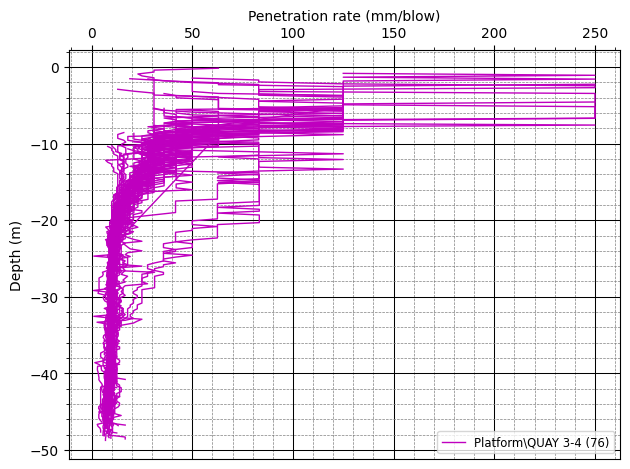

In [24]:
# Crear una figura
fig, ax = plt.subplots()

# Contar el número de archivos CSV en la carpeta
archivos_csv = [archivo for archivo in os.listdir(carpeta) if archivo.endswith(".csv")]
num_archivos = len(archivos_csv)

# Definir el label con el nombre de la carpeta y el número de archivos
label = f"{carpeta} ({num_archivos})"

# Iterar sobre los archivos CSV en la carpeta
for i, archivo in enumerate(archivos_csv):
    # Leer el archivo CSV
    table = pd.read_csv(os.path.join(carpeta, archivo), sep="\t", header=0)

    # Limpiar y procesar los datos
    table = table.dropna(subset=["Blow_Count"])
    table["Toe Level"] = table["Toe Level"].str.replace("MLWS", "", regex=False)
    table = table.map(
        lambda x: str(x).replace(",", ".") if isinstance(x, str) else x
    )
    table["Toe Level"] = pd.to_numeric(table["Toe Level"])
    table["Penetration_per_blow(mm/blow)"] = pd.to_numeric(
        table["Penetration_per_blow(mm/blow)"]
    )
    table_cleaned = table.dropna(subset=["Penetration_per_blow(mm/blow)"])

    # Definir las variables para graficar
    x = table_cleaned["Penetration_per_blow(mm/blow)"]
    y = table_cleaned["Toe Level"]+29.5

    # Graficar con el color especificado
    ax.plot(x, y, linestyle="-", linewidth=1, color=color, label=label if i == 0 else "")

# Ajustar el eje x en la parte superior
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")

# Etiquetas y leyenda
plt.xlabel("Penetration rate (mm/blow)")
plt.ylabel("Depth (m)")
plt.grid(which="major", color="black", linestyle="-", linewidth=0.75)
plt.minorticks_on()
plt.grid(which="minor", color="gray", linestyle="--", linewidth=0.5)
plt.legend(loc="lower right",  fontsize='small')  # Ajustar la leyenda para que no se solape

# Guardar la gráfica
nombre_imagen = os.path.join("Images", "Platform_QUAY 3-4" + ".png")
plt.savefig(nombre_imagen, dpi=600, bbox_inches="tight")
plt.tight_layout()
# Mostrar la gráfica
plt.show()

## VARIAS CARPETAS

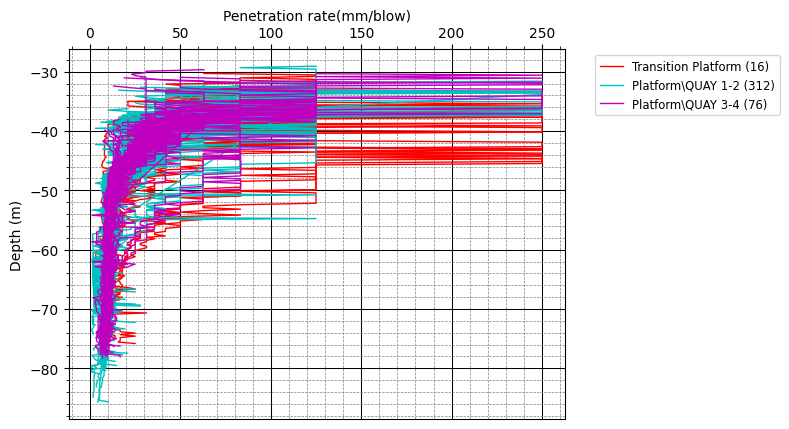

In [26]:
# Lista de carpetas donde están los archivos CSV
carpetas = [
    #"Bridge\EJE_2", #blue 'g'
    #"Bridge\EJE_1",  #green 'b'
    "Transition Platform", #red 'r'
    "Platform\\QUAY 1-2", #cyan 'c'
    "Platform\\QUAY 3-4", #magenta 'm'
]

# Lista de colores para las líneas (puedes añadir más colores si es necesario)
colores = [
    #"b", 
    #"g", 
    "r", 
    "c", 
    "m", 
    "y", 
    "k"
]

# Crear una figura
fig, ax = plt.subplots()

# Iterar sobre cada carpeta
for carpeta_idx, carpeta in enumerate(carpetas):
    color_carpeta = colores[carpeta_idx % len(colores)] 
    nombre_carpeta = carpeta  # Obtener el nombre de la carpeta

    # Contar el número de archivos CSV en la carpeta
    archivos_csv = [archivo for archivo in os.listdir(carpeta) if archivo.endswith(".csv")]
    num_archivos = len(archivos_csv)

    # Definir el label con el nombre de la carpeta y el número de archivos
    label = f"{nombre_carpeta} ({num_archivos})"

    # Iterar sobre los archivos CSV en la carpeta actual
    for i, archivo in enumerate(archivos_csv):
        # Leer el archivo CSV
        table = pd.read_csv(os.path.join(carpeta, archivo), sep="\t", header=0)

        # Limpiar y procesar los datos
        table = table.dropna(subset=["Blow_Count"])
        table["Toe Level"] = table["Toe Level"].str.replace("MLWS", "", regex=False)
        table = table.map(
            lambda x: str(x).replace(",", ".") if isinstance(x, str) else x
        )
        table["Toe Level"] = pd.to_numeric(table["Toe Level"])
        table["Penetration_per_blow(mm/blow)"] = pd.to_numeric(
            table["Penetration_per_blow(mm/blow)"]
        )
        table_cleaned = table.dropna(subset=["Penetration_per_blow(mm/blow)"])

        # Definir las variables para graficar
        x = table_cleaned["Penetration_per_blow(mm/blow)"]
        y = table_cleaned["Toe Level"]

        # Graficar con un color distinto para cada carpeta
        ax.plot(x, y, linestyle="-", linewidth=1, color=color_carpeta, label=label if i == 0 else "")

# Ajustar el eje x en la parte superior
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")

# Etiquetas y leyenda
plt.xlabel("Penetration rate(mm/blow)")
plt.ylabel("Depth (m)")
plt.grid(which="major", color="black", linestyle="-", linewidth=0.75)
plt.minorticks_on()
plt.grid(which="minor", color="gray", linestyle="--", linewidth=0.5)
plt.legend( loc="best",bbox_to_anchor=(1.05, 1), fontsize='small')  # Ajustar la leyenda para que no se solape

# Guardar la gráfica
nombre_imagen = os.path.join("Images", "All_Zones_data_correct.png")
plt.savefig(nombre_imagen, dpi=600, bbox_inches="tight")

# Mostrar la gráfica
plt.show()